In [8]:
#We will look at data from http://crisislex.org/data-collections.html#CrisisLexT26
#Namely, from the 2013 NY Train Crash
#We want to load the file 2013_NY_train_crash-tweets_labeled.csv into a dataframe called tweets
#File does not contain time stamps.
#Add time stamps from the file: `'2013_NY_train_crash-tweetids_entire_period.csv'`. 
#Pass the option `parse_dates=['Timestamp']` to properly load the timestamps as times.
#This file contains duplicates, run pandas drop_duplicates to fix this.
#Take coloumn with Tiemstamp and add it to tweets as a new coloumn.
#We now have a DataFrame with tweets, timestamps and three other columns with manually annotated labels.

In [9]:
import pandas as pd 

tweets = pd.read_csv('2013_NY_train_crash/2013_NY_train_crash-tweets_labeled.csv') 

tweets.columns = ['Tweet_ID','Tweet_Text','Information_Source','Information_Type','Informativeness']

times = pd.read_csv('2013_NY_train_crash/2013_NY_train_crash-tweetids_entire_period.csv', parse_dates=['Timestamp'])

times = times.drop_duplicates(subset=None, keep='first', inplace=False)

tweets['Timestamp'] = times['Timestamp']

tweets.head()

,Tweet_ID,Tweet_Text,Information_Source,Information_Type,Informativeness,Timestamp
0,407129710162759680,NYPD calling Level 3 mobilization (borough-wid...,Government,Other Useful Information,Related and informative,2013-12-01 12:51:01+00:00
1,407132226753921024,RT @AP: BREAKING: Police say a Metro-North pas...,Media,Other Useful Information,Related and informative,2013-12-01 13:14:20+00:00
2,407132251882020865,RT @AP: BREAKING: Police say a Metro-North pas...,Media,Other Useful Information,Related and informative,2013-12-01 13:16:16+00:00
3,407132730070433792,RT @AP: BREAKING: Police say a Metro-North pas...,Media,Other Useful Information,Related and informative,2013-12-01 13:17:22+00:00
4,407132738450640896,RT @AP: BREAKING: Police say a Metro-North pas...,Media,Other Useful Information,Related and informative,2013-12-01 13:18:42+00:00


In [11]:
#Who is quicker to report on a disaster, the media or outsiders? 
#Does the former react to the latter, or vice versa?

#Select all tweets about "Affected individuals".
#For the resulting tweets we are interested in contrasting those that are close in time to the disaster 
#(before 16:00 UTC), with tweets which are sent later. 
#Add a column `'later'` indicating whether the tweet was after `'2013-12-01 16:00:00'`. 
#Note that you can compare the Timestamp column to a string with this time to achieve this:
    #`tweets['Timestamp'] > '2013-12-01 16:00:00'`

#Create a contigency table and a bar plot showing the number of tweets 
#depending on the source and whether the tweet is 'later' or not.

In [12]:
import pandas as pd 

tweets = pd.read_csv('2013_NY_train_crash/2013_NY_train_crash-tweets_labeled.csv') 

tweets.columns = ['Tweet_ID','Tweet_Text','Information_Source','Information_Type','Informativeness']

times = pd.read_csv('2013_NY_train_crash/2013_NY_train_crash-tweetids_entire_period.csv', parse_dates=['Timestamp'])

times = times.drop_duplicates(subset=None, keep='first', inplace=False)

tweets['Timestamp'] = times['Timestamp']

tweets['later'] = tweets['Timestamp'] > '2013-12-01 16:00:00'

affected = tweets.loc[tweets['Information_Type'] == 'Affected individuals']

results = pd.crosstab(affected['Information_Source'], affected['later'])

results

later,False,True
Information_Source,,
Eyewitness,2,1
Government,3,6
Media,95,233
NGOs,1,0
Outsiders,5,40


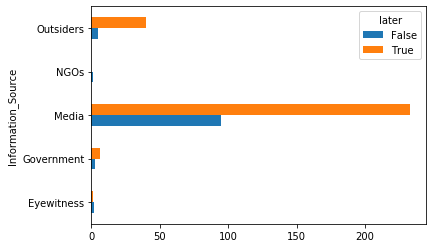

In [14]:
results.plot.barh()

In [15]:
## Hypothesis: Outsider's tweet largely sympathy and suppourt and not much informative content.
## As opposed to the media who tweets mostly informative content and not much sympathy and suppourt.
## I define Informative content as:
## Information regarding the affected individuals, Infrastructure and utilities and other useful information.

import pandas as pd

tweets = pd.read_csv('2013_NY_train_crash/2013_NY_train_crash-tweets_labeled.csv') 

tweets.columns = ['Tweet_ID','Tweet_Text','Information_Source','Information_Type','Informativeness']

times = pd.read_csv('2013_NY_train_crash/2013_NY_train_crash-tweetids_entire_period.csv', parse_dates=['Timestamp'])

times = times.drop_duplicates(subset=None, keep='first', inplace=False)

hypothesis_results = pd.crosstab(tweets['Information_Source'], tweets['Information_Type'])

hypothesis_results

Information_Type,Affected individuals,Caution and advice,Donations and volunteering,Infrastructure and utilities,Not labeled,Other Useful Information,Sympathy and support
Information_Source,,,,,,,
Business,0,0,0,0,0,2,0
Eyewitness,3,0,0,0,0,0,0
Government,9,1,0,3,0,26,0
Media,328,27,3,37,0,365,5
NGOs,1,0,0,0,0,0,0
Not labeled,0,0,0,0,1,0,0
Outsiders,45,2,1,11,0,63,67


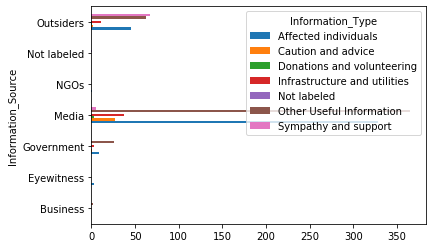

In [16]:
## My hypothesis was partially correct.
## Outsider's do tweet more sympathy and suppourt than useful information, however, only marginally.
## The media on the other hand tweets largely informative content and very little sympathy and suppourt.

hypothesis_results.plot.barh()